We first import the necessary libraries and fetch the dataset. We then split the data into training and testing sets.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7738, 30) (3317, 30) (7738, 1) (3317, 1)


We then train a decision tree classifier and visualize the tree.

We first train a decision tree classifier with a maximum depth of 3 and visualize the tree and calculate the accuracy of the prediction.

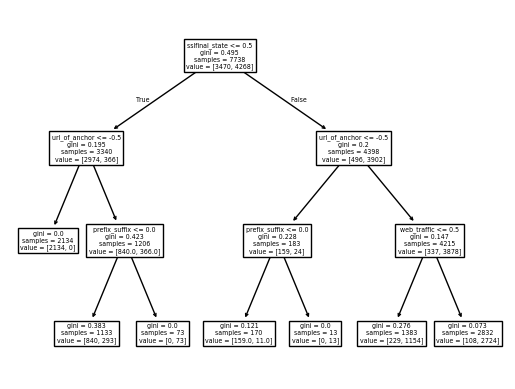

[[-1]
 [-1]
 [-1]
 ...
 [ 1]
 [ 1]
 [ 1]]
[-1 -1 -1 ...  1  1  1]


0.9170937594211637

In [60]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_pruned = DecisionTreeClassifier(random_state=42, max_depth=3)
model_pruned.fit(X_train, y_train)

plot_tree(model_pruned, feature_names=X_train.keys())
plt.show()

print(y_test.values)
prediction_pruned = model_pruned.predict(X_test)
print(prediction_pruned)

accuracy_score(y_test, prediction_pruned)

We then train a decision tree classifier with a cost complexity pruning alpha of 0.012 and visualize the tree and calculate the accuracy of the prediction.

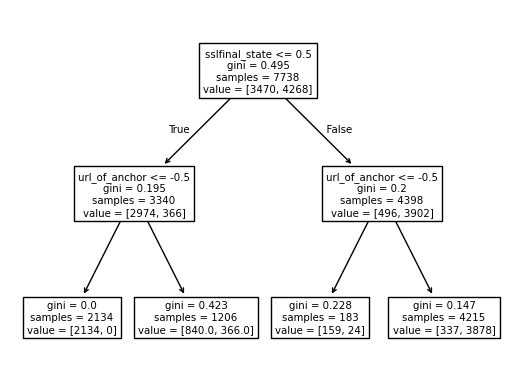

[[-1]
 [-1]
 [-1]
 ...
 [ 1]
 [ 1]
 [ 1]]
[-1 -1 -1 ...  1  1  1]


0.9068435333132349

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.012)
model.fit(X_train, y_train)

plot_tree(model, feature_names=X_train.keys())
plt.show()

print(y_test.values)
prediction = model.predict(X_test)
print(prediction)

accuracy_score(y_test, prediction)


From the two different decision tree classifiers, we can see that the first classifier with a maximum depth of 3 has an accuracy of 0.9116, while the second classifier with a cost complexity pruning alpha of 0.012 has an accuracy of 0.9068. The two classifiers have similar accuracy, but the second classifier has a more complex tree structure.

We will use the second classifier with a cost complexity pruning alpha of 0.012 for further analysis.

### Written instriuctions:

To find out if a site is a phishing site, follow these steps:
- If the sslfinal_state of the site is less than or equal to 0.5
    - And if the url_of_anchor is less than or equal to -0.5, then <b> it is a legitimate site </b>
    - Otherwise, if the utl_of_anchor is more than -0.5, then with a <b> 58% certainty it is a legitimate site </b>
- If the ssl-final_State of the site is more than 0.5
    - And if the url_of_anchor is less than or equal to -0.5, then with a <b> 78% certainty it is a legitimate site </b>
    - Otherwise, if the utl_of_anchor is more than -0.5, then with a <b> 86% certainty it is a phishing site </b>

# Random Forest:

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Make grid search of good variables
param_grid = {
    'max_depth': [6, 12],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.5, 0.7, 0.9],
    'min_samples_leaf': [100, 200],
    'ccp_alpha': [0.01, 0.1, 0.3]
}
rf = RandomForestClassifier(random_state=42)

y_train_raveled = y_train.values.ravel()
y_test_raveled = y_test.values.ravel()

from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
gridSearch.fit(X_train, y_train_raveled)

print(f"Best parameters: {gridSearch.best_params_}")
print(f"Best score: {gridSearch.best_score_}")

best_rf = gridSearch.best_estimator_
best_rf.fit(X_train, y_train_raveled)

# Predict using the random forest model
rf_predictions = best_rf.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test_raveled, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'ccp_alpha': 0.01, 'max_depth': 6, 'max_features': 'log2', 'max_samples': 0.9, 'min_samples_leaf': 100, 'n_estimators': 100}
Best score: 0.922589880700109
Random Forest Accuracy: 0.9315646668676515


In [68]:
# Display the confusion matrix and the classification report
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = best_rf.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

# Display the feature importances for features used in the random forest
feature_importances = best_rf.feature_importances_

# Print the feature importances sorted by importance. Print only 5 most important features
print("Feature importances:")
for idx in np.argsort(feature_importances)[::-1][:5]:
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")



Confusion matrix:
[[1268  160]
 [  67 1822]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      1428
           1       0.92      0.96      0.94      1889

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
sslfinal_state: 0.3367956406210424
url_of_anchor: 0.3228320189808136
having_sub_domain: 0.08685212517284226
web_traffic: 0.08309476521412264
prefix_suffix: 0.06860823353841868
